In [54]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
# read data
bts1 = pd.read_csv('../data/raw/bts/dark_wild_final.csv')
taylor1 = pd.read_csv('../data/raw/taylor/nine_final.csv')
justin1 = pd.read_csv('../data/raw/justin/believe_final.csv')

bts2 = pd.read_csv('../data/raw/bts/love_final.csv')
taylor2 = pd.read_csv('../data/raw/taylor/reputation_final.csv')
justin2 = pd.read_csv('../data/raw/justin/purpose_final.csv')

bts3 = pd.read_csv('../data/raw/bts/be_final.csv')
taylor3 = pd.read_csv('../data/raw/taylor/folklore_final.csv')
justin3 = pd.read_csv('../data/raw/justin/changes_final.csv')

In [86]:
def plot_albums(title, outdir=None, *album_tups):
    '''
    Plots multiple albums as a single overlayed line plot with
    normalized dates

    :param title: Title of overlaid plot
    :outdir: output filepath for plot
    '''
    assert len(album_tups) > 1, 'passed in only one album'
    assert len(album_tups[0]) == 2, 'need to pass in both album and legend name'
    assert all(['normalized_dates' in album.columns for album, leg in album_tups])
    
    legend = []
    album, leg = album_tups[0]
    legend.append(leg)
    
    fig_dims = (6, 7)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.lineplot(x='normalized_dates', y=0, data=album.groupby('normalized_dates').size().reset_index(), ax=ax)
    for album_tup in album_tups[1:]:
        album, leg = album_tup
        legend.append(leg)
        sns.lineplot(x='normalized_dates', y=0, data=album.groupby('normalized_dates').size().reset_index(), ax=ax)
        
    # release date line
    max_counts = album.normalized_dates.value_counts().max()
    ax.axvline(0, color='purple', alpha=0.5)
    
    # legend
    ax.legend(legend)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel('Dates With Respect to Album Release', fontsize=13)
    ax.set_ylabel('Number of Original Tweets', fontsize=13)
    ax.set_ylim(0, 300000)
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    if outdir:
        ax.figure.savefig(os.path.join(outdir, title + '.png'))

# Tweets

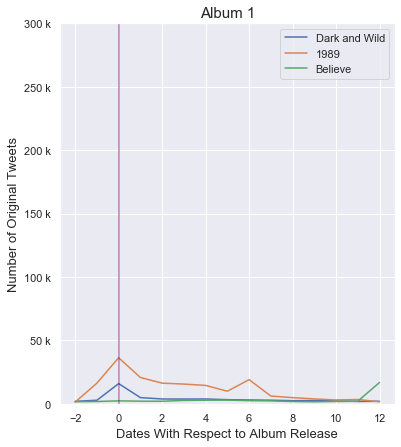

In [87]:
plot_albums('Album 1', None, (bts1, 'Dark and Wild'), (taylor1, '1989'), (justin1, 'Believe'))

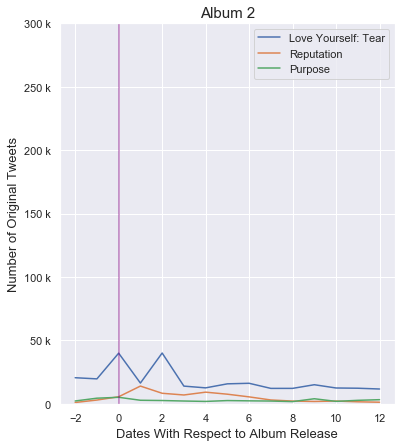

In [88]:
plot_albums('Album 2', None, (bts2, 'Love Yourself: Tear'), (taylor2, 'Reputation'), (justin2, 'Purpose'))

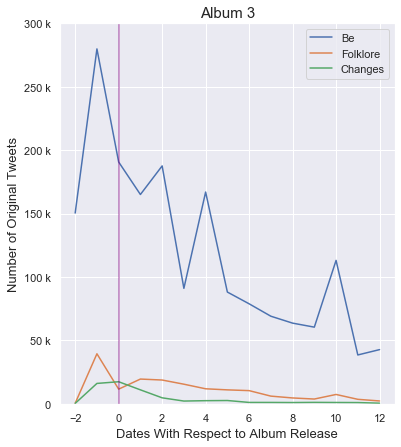

In [89]:
plot_albums('Album 3', None, (bts3, 'Be'), (taylor3, 'Folklore'), (justin3, 'Changes'))

# Analysis
## Follower Stats
Idea: sheer numbers. Even though BTS has significantly less followers, those followers pull their weight with twitter collaboration and tweet/retweet like crazy <br><br>
JB 1:  24M<br>
JB 2:  69M<br>
JB 3:  110M<br><br>
TS 1:  46M<br>
TS 2:  85M<br>
TS 3:  86M<br><br>
BTS 1: 255K<br>
BTS 2: 11M<br>
BTS 3: 25M<br>

## Num Hashtags
Hypothesis: tweets with more hashtags get more engagement (retweets/likes). BTS has stronger collaboration because more hashtags in tweets (shows up more places on twitter?)

### Justin hashtags

In [99]:
justin1.hashtags.apply(lambda x: len(eval(x))).mean()

1.9768065781812048

In [93]:
justin2.hashtags.apply(lambda x: len(eval(x))).mean()

2.372918559658598

In [94]:
justin3.hashtags.apply(lambda x: len(eval(x))).mean()

1.8069045533113917

### Taylor hashtags

In [101]:
taylor1.hashtags.apply(lambda x: len(eval(x))).mean()

1.9723863082347872

In [95]:
taylor2.hashtags.apply(lambda x: len(eval(x))).mean()

2.1336573348863985

In [96]:
taylor3.hashtags.apply(lambda x: len(eval(x))).mean()

2.216227364846688

### BTS hashtags

In [100]:
bts1.hashtags.apply(lambda x: len(eval(x))).mean()

3.234565337763012

In [97]:
bts2.hashtags.apply(lambda x: len(eval(x))).mean()

3.7365996094120324

In [98]:
bts3.hashtags.apply(lambda x: len(eval(x))).mean()

3.7969576703532364

## Retweets
Ideas: compare retweet to like ratios across groups. Higher ratio == higher collaboration (more effort than liking)

In [79]:
bts3.groupby('username').retweets_count.sum().sort_values(ascending=False).head(20)

username
bts_bighit         8315095
bighitent          3848022
blackxagustd        862504
jimintoday__        831480
armyteamiid         680061
gma                 548104
fila_korea          513752
kimseokjingifs      436180
bts_history613      305788
weverseofficial     304956
soompi              246418
spotify             214352
bts_jp_official     213774
btsdailyinfo        196581
blackxagustdmp4     159076
serietv46           146467
columbiarecords     124106
only_moment__v      112164
7bts__update        110561
pandoramusic        109579
Name: retweets_count, dtype: int64

In [80]:
bts3.groupby('username').likes_count.sum().sort_values(ascending=False).head(20)

username
bts_bighit         37278495
bighitent          16846443
blackxagustd        3365855
armyteamiid         3265292
jimintoday__        2765465
fila_korea          2694114
gma                 2334265
bts_jp_official     1845865
weverseofficial     1702692
soompi              1658705
kimseokjingifs      1510871
bts_history613      1003858
spotify              994946
pandoramusic         923427
7bts__update         861994
bangtan_lab          859288
columbiarecords      710663
btsdailyinfo         701014
btsnewsbrasil        674508
serietv46            551286
Name: likes_count, dtype: int64

## a% makes b% tweets
Idea: larger value potentially means more organizers. Can study stats for "organizers" (avg retweets/likes for engagement)

In [11]:
bts3.username.value_counts().mean()

6.445221007864659

In [12]:
taylor3.username.value_counts().mean()

2.6812586157150644

In [13]:
justin3.username.value_counts().mean()

2.577658421960114

In [40]:
def percent_tweets(df, a):
    prop = (df.username.value_counts().iloc[:int(df.username.nunique() * a)]).sum() / len(df)
    return round(prop * 100, 2)

In [45]:
percent_tweets(bts3, 0.03)

0.3895745444753613

In [46]:
percent_tweets(taylor3, 0.03)

0.3300353314641335

In [47]:
percent_tweets(justin3, 0.03)

0.3222894419056188

## Num tweets / num users

In [51]:
len(bts2) / bts2.username.nunique()

3.4329436575713395

In [52]:
len(taylor2) / taylor2.username.nunique()

2.1345774627761425

In [53]:
len(justin2) / justin2.username.nunique()

2.068092563658629